In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [2]:
plt.style.use("ggplot")

In [3]:
mitbih = pd.read_csv("mitbih_test.csv", header = None)
mitbih_train = pd.read_csv("mitbih_train.csv", header = None)

In [4]:
data = mitbih_train.iloc[:, :186].values
labels = mitbih_train.iloc[:, 187].values

In [5]:
from keras.utils import to_categorical

one_hot_labels = np.zeros((len(labels), 5))
one_hot_labels[:] = to_categorical(labels[:], num_classes = 5)

Using TensorFlow backend.


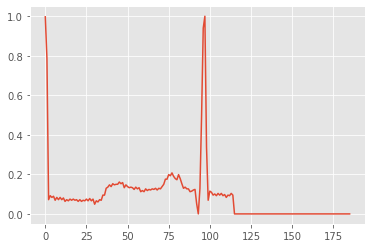

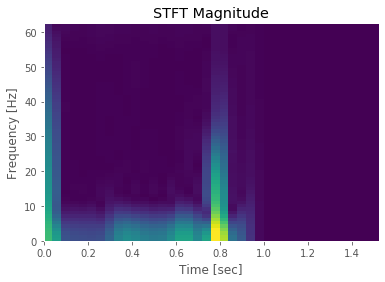

In [7]:
from scipy import signal

fs = 125

f = data[23]

plt.figure()
plt.plot(f)

f, t, Zxx = signal.stft(f, fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [8]:
print(Zxx.shape)

(65, 39)


In [9]:
df_1=mitbih_train[mitbih_train[187]==1].sample(n=10,random_state=42).iloc[:, :186].values
df_2=mitbih_train[mitbih_train[187]==2].sample(n=10,random_state=42).iloc[:, :186].values
df_3=mitbih_train[mitbih_train[187]==3].sample(n=10,random_state=42).iloc[:, :186].values
df_4=mitbih_train[mitbih_train[187]==4].sample(n=10,random_state=42).iloc[:, :186].values
df_0=(mitbih_train[mitbih_train[187]==0]).sample(n=10,random_state=42).iloc[:, :186].values

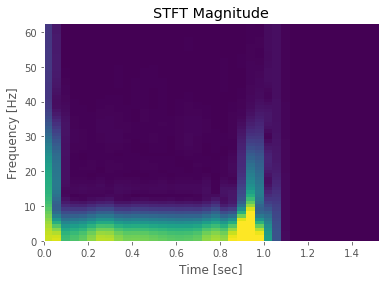

In [10]:
f, t, Zxx = signal.stft(df_0[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

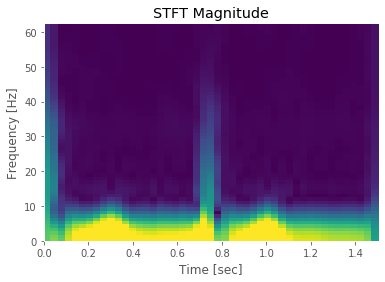

In [11]:
f, t, Zxx = signal.stft(df_1[2], fs, nperseg=20, noverlap = 16, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [12]:
f, t, Zxx = signal.stft(df_2[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

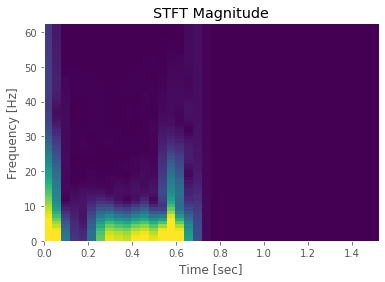

In [13]:
f, t, Zxx = signal.stft(df_3[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

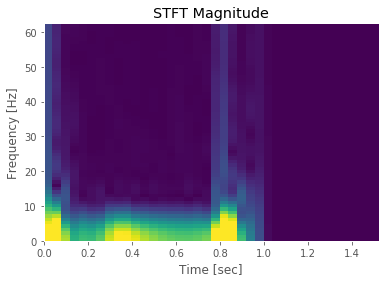

In [17]:
f, t, Zxx = signal.stft(df_4[1], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [18]:
print(len(data))

87554


In [19]:
data_stft = []

for i in range(len(data)):
    f, t, aZxx = signal.stft(f, fs, nperseg=20, noverlap = 15, nfft = 128)
    data_stft.append(np.abs(aZxx))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221


3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125


5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906


7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730


9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439


10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
1104

12496
12497
12498
12499
12500
12501
12502
12503
12504
12505
12506
12507
12508
12509
12510
12511
12512
12513
12514
12515
12516
12517
12518
12519
12520
12521
12522
12523
12524
12525
12526
12527
12528
12529
12530
12531
12532
12533
12534
12535
12536
12537
12538
12539
12540
12541
12542
12543
12544
12545
12546
12547
12548
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12560
12561
12562
12563
12564
12565
12566
12567
12568
12569
12570
12571
12572
12573
12574
12575
12576
12577
12578
12579
12580
12581
12582
12583
12584
12585
12586
12587
12588
12589
12590
12591
12592
12593
12594
12595
12596
12597
12598
12599
12600
12601
12602
12603
12604
12605
12606
12607
12608
12609
12610
12611
12612
12613
12614
12615
12616
12617
12618
12619
12620
12621
12622
12623
12624
12625
12626
12627
12628
12629
12630
12631
12632
12633
12634
12635
12636
12637
12638
12639
12640
12641
12642
12643
12644
12645
12646
12647
12648
12649
12650
12651
12652
12653
12654
12655
12656
12657
12658
12659
12660
12661
1266

14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
1423

15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
1577

17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
1742

18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
1884

20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
2024

21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21654
21655
21656
21657
21658
21659
21660
21661
21662
21663
21664
21665
21666
21667
21668
21669
21670
21671
21672
21673
21674
21675
21676
21677
2167

22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22992
22993
22994
22995
22996
22997
22998
22999
23000
23001
23002
23003
23004
23005
23006
23007
23008
23009
23010
23011
23012
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
2311

24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24606
24607
24608
24609
24610
24611
24612
24613
24614
24615
24616
24617
24618
24619
24620
24621
24622
24623
24624
24625
24626
24627
24628
24629
24630
24631
24632
24633
24634
24635
24636
24637
2463

26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
26075
26076
26077
26078
26079
26080
26081
26082
26083
26084
26085
26086
26087
26088
26089
26090
26091
26092
26093
26094
26095
26096
26097
26098
26099
26100
26101
26102
26103
26104
26105
26106
26107
26108
26109
26110
26111
26112
26113
26114
26115
26116
26117
26118
26119
26120
26121
26122
26123
26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
26141
26142
26143
26144
26145
26146
26147
26148
26149
26150
26151
26152
26153
26154
26155
26156
26157
26158
26159
26160
26161
26162
26163
26164
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
2620

27580
27581
27582
27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
27696
27697
27698
27699
27700
27701
27702
27703
27704
27705
27706
27707
27708
27709
27710
27711
27712
27713
27714
27715
27716
27717
27718
27719
27720
27721
27722
27723
27724
27725
27726
27727
27728
27729
27730
27731
27732
27733
27734
27735
27736
27737
27738
27739
27740
27741
27742
27743
27744
27745
2774

29148
29149
29150
29151
29152
29153
29154
29155
29156
29157
29158
29159
29160
29161
29162
29163
29164
29165
29166
29167
29168
29169
29170
29171
29172
29173
29174
29175
29176
29177
29178
29179
29180
29181
29182
29183
29184
29185
29186
29187
29188
29189
29190
29191
29192
29193
29194
29195
29196
29197
29198
29199
29200
29201
29202
29203
29204
29205
29206
29207
29208
29209
29210
29211
29212
29213
29214
29215
29216
29217
29218
29219
29220
29221
29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
2931

30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
30833
30834
30835
30836
30837
30838
30839
30840
30841
30842
30843
30844
30845
30846
30847
30848
30849
30850
30851
30852
30853
30854
30855
30856
30857
30858
30859
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
3091

32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
32330
32331
32332
32333
32334
32335
32336
32337
32338
32339
32340
32341
32342
32343
32344
32345
32346
32347
32348
32349
32350
32351
32352
32353
32354
32355
32356
32357
32358
32359
32360
32361
32362
32363
32364
32365
32366
32367
32368
32369
32370
32371
3237

33640
33641
33642
33643
33644
33645
33646
33647
33648
33649
33650
33651
33652
33653
33654
33655
33656
33657
33658
33659
33660
33661
33662
33663
33664
33665
33666
33667
33668
33669
33670
33671
33672
33673
33674
33675
33676
33677
33678
33679
33680
33681
33682
33683
33684
33685
33686
33687
33688
33689
33690
33691
33692
33693
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
33728
33729
33730
33731
33732
33733
33734
33735
33736
33737
33738
33739
33740
33741
33742
33743
33744
33745
33746
33747
33748
33749
33750
33751
33752
33753
33754
33755
33756
33757
33758
33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
3380

35132
35133
35134
35135
35136
35137
35138
35139
35140
35141
35142
35143
35144
35145
35146
35147
35148
35149
35150
35151
35152
35153
35154
35155
35156
35157
35158
35159
35160
35161
35162
35163
35164
35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
3529

36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
36860
36861
36862
36863
36864
36865
36866
36867
36868
3686

38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
38335
38336
38337
38338
38339
38340
38341
38342
38343
38344
38345
38346
38347
38348
38349
38350
38351
38352
38353
38354
38355
38356
38357
38358
38359
38360
38361
38362
38363
38364
38365
38366
38367
38368
38369
38370
38371
38372
38373
38374
38375
38376
38377
38378
38379
38380
38381
38382
38383
38384
38385
38386
38387
38388
38389
38390
38391
38392
38393
38394
38395
38396
38397
38398
38399
38400
38401
38402
38403
38404
38405
38406
38407
38408
38409
38410
38411
38412
38413
38414
38415
38416
38417
38418
38419
38420
38421
38422
38423
38424
38425
38426
38427
38428
38429
38430
38431
38432
38433
38434
38435
38436
38437
38438
3843

39796
39797
39798
39799
39800
39801
39802
39803
39804
39805
39806
39807
39808
39809
39810
39811
39812
39813
39814
39815
39816
39817
39818
39819
39820
39821
39822
39823
39824
39825
39826
39827
39828
39829
39830
39831
39832
39833
39834
39835
39836
39837
39838
39839
39840
39841
39842
39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39881
39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39941
39942
39943
39944
39945
39946
39947
39948
39949
39950
39951
39952
39953
39954
39955
39956
39957
39958
39959
39960
39961
3996

41267
41268
41269
41270
41271
41272
41273
41274
41275
41276
41277
41278
41279
41280
41281
41282
41283
41284
41285
41286
41287
41288
41289
41290
41291
41292
41293
41294
41295
41296
41297
41298
41299
41300
41301
41302
41303
41304
41305
41306
41307
41308
41309
41310
41311
41312
41313
41314
41315
41316
41317
41318
41319
41320
41321
41322
41323
41324
41325
41326
41327
41328
41329
41330
41331
41332
41333
41334
41335
41336
41337
41338
41339
41340
41341
41342
41343
41344
41345
41346
41347
41348
41349
41350
41351
41352
41353
41354
41355
41356
41357
41358
41359
41360
41361
41362
41363
41364
41365
41366
41367
41368
41369
41370
41371
41372
41373
41374
41375
41376
41377
41378
41379
41380
41381
41382
41383
41384
41385
41386
41387
41388
41389
41390
41391
41392
41393
41394
41395
41396
41397
41398
41399
41400
41401
41402
41403
41404
41405
41406
41407
41408
41409
41410
41411
41412
41413
41414
41415
41416
41417
41418
41419
41420
41421
41422
41423
41424
41425
41426
41427
41428
41429
41430
41431
41432
4143

42767
42768
42769
42770
42771
42772
42773
42774
42775
42776
42777
42778
42779
42780
42781
42782
42783
42784
42785
42786
42787
42788
42789
42790
42791
42792
42793
42794
42795
42796
42797
42798
42799
42800
42801
42802
42803
42804
42805
42806
42807
42808
42809
42810
42811
42812
42813
42814
42815
42816
42817
42818
42819
42820
42821
42822
42823
42824
42825
42826
42827
42828
42829
42830
42831
42832
42833
42834
42835
42836
42837
42838
42839
42840
42841
42842
42843
42844
42845
42846
42847
42848
42849
42850
42851
42852
42853
42854
42855
42856
42857
42858
42859
42860
42861
42862
42863
42864
42865
42866
42867
42868
42869
42870
42871
42872
42873
42874
42875
42876
42877
42878
42879
42880
42881
42882
42883
42884
42885
42886
42887
42888
42889
42890
42891
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
4293

44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
4453

45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
45932
45933
45934
45935
45936
45937
45938
45939
45940
45941
45942
45943
45944
45945
45946
45947
45948
45949
45950
45951
45952
45953
45954
45955
45956
45957
45958
45959
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46001
46002
46003
46004
46005
46006
46007
46008
46009
46010
46011
46012
46013
46014
46015
46016
46017
46018
46019
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
4605

47484
47485
47486
47487
47488
47489
47490
47491
47492
47493
47494
47495
47496
47497
47498
47499
47500
47501
47502
47503
47504
47505
47506
47507
47508
47509
47510
47511
47512
47513
47514
47515
47516
47517
47518
47519
47520
47521
47522
47523
47524
47525
47526
47527
47528
47529
47530
47531
47532
47533
47534
47535
47536
47537
47538
47539
47540
47541
47542
47543
47544
47545
47546
47547
47548
47549
47550
47551
47552
47553
47554
47555
47556
47557
47558
47559
47560
47561
47562
47563
47564
47565
47566
47567
47568
47569
47570
47571
47572
47573
47574
47575
47576
47577
47578
47579
47580
47581
47582
47583
47584
47585
47586
47587
47588
47589
47590
47591
47592
47593
47594
47595
47596
47597
47598
47599
47600
47601
47602
47603
47604
47605
47606
47607
47608
47609
47610
47611
47612
47613
47614
47615
47616
47617
47618
47619
47620
47621
47622
47623
47624
47625
47626
47627
47628
47629
47630
47631
47632
47633
47634
47635
47636
47637
47638
47639
47640
47641
47642
47643
47644
47645
47646
47647
47648
47649
4765

49192
49193
49194
49195
49196
49197
49198
49199
49200
49201
49202
49203
49204
49205
49206
49207
49208
49209
49210
49211
49212
49213
49214
49215
49216
49217
49218
49219
49220
49221
49222
49223
49224
49225
49226
49227
49228
49229
49230
49231
49232
49233
49234
49235
49236
49237
49238
49239
49240
49241
49242
49243
49244
49245
49246
49247
49248
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
4935

50584
50585
50586
50587
50588
50589
50590
50591
50592
50593
50594
50595
50596
50597
50598
50599
50600
50601
50602
50603
50604
50605
50606
50607
50608
50609
50610
50611
50612
50613
50614
50615
50616
50617
50618
50619
50620
50621
50622
50623
50624
50625
50626
50627
50628
50629
50630
50631
50632
50633
50634
50635
50636
50637
50638
50639
50640
50641
50642
50643
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
50680
50681
50682
50683
50684
50685
50686
50687
50688
50689
50690
50691
50692
50693
50694
50695
50696
50697
50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
5075

52233
52234
52235
52236
52237
52238
52239
52240
52241
52242
52243
52244
52245
52246
52247
52248
52249
52250
52251
52252
52253
52254
52255
52256
52257
52258
52259
52260
52261
52262
52263
52264
52265
52266
52267
52268
52269
52270
52271
52272
52273
52274
52275
52276
52277
52278
52279
52280
52281
52282
52283
52284
52285
52286
52287
52288
52289
52290
52291
52292
52293
52294
52295
52296
52297
52298
52299
52300
52301
52302
52303
52304
52305
52306
52307
52308
52309
52310
52311
52312
52313
52314
52315
52316
52317
52318
52319
52320
52321
52322
52323
52324
52325
52326
52327
52328
52329
52330
52331
52332
52333
52334
52335
52336
52337
52338
52339
52340
52341
52342
52343
52344
52345
52346
52347
52348
52349
52350
52351
52352
52353
52354
52355
52356
52357
52358
52359
52360
52361
52362
52363
52364
52365
52366
52367
52368
52369
52370
52371
52372
52373
52374
52375
52376
52377
52378
52379
52380
52381
52382
52383
52384
52385
52386
52387
52388
52389
52390
52391
52392
52393
52394
52395
52396
52397
52398
5239

53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
5412

55372
55373
55374
55375
55376
55377
55378
55379
55380
55381
55382
55383
55384
55385
55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
55489
55490
55491
55492
55493
55494
55495
55496
55497
55498
55499
55500
55501
55502
55503
55504
55505
55506
55507
55508
55509
55510
55511
55512
55513
55514
55515
55516
55517
55518
55519
55520
55521
55522
55523
55524
55525
55526
55527
55528
55529
55530
55531
55532
55533
55534
55535
55536
55537
5553

56805
56806
56807
56808
56809
56810
56811
56812
56813
56814
56815
56816
56817
56818
56819
56820
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
56832
56833
56834
56835
56836
56837
56838
56839
56840
56841
56842
56843
56844
56845
56846
56847
56848
56849
56850
56851
56852
56853
56854
56855
56856
56857
56858
56859
56860
56861
56862
56863
56864
56865
56866
56867
56868
56869
56870
56871
56872
56873
56874
56875
56876
56877
56878
56879
56880
56881
56882
56883
56884
56885
56886
56887
56888
56889
56890
56891
56892
56893
56894
56895
56896
56897
56898
56899
56900
56901
56902
56903
56904
56905
56906
56907
56908
56909
56910
56911
56912
56913
56914
56915
56916
56917
56918
56919
56920
56921
56922
56923
56924
56925
56926
56927
56928
56929
56930
56931
56932
56933
56934
56935
56936
56937
56938
56939
56940
56941
56942
56943
56944
56945
56946
56947
56948
56949
56950
56951
56952
56953
56954
56955
56956
56957
56958
56959
56960
56961
56962
56963
56964
56965
56966
56967
56968
56969
56970
5697

58249
58250
58251
58252
58253
58254
58255
58256
58257
58258
58259
58260
58261
58262
58263
58264
58265
58266
58267
58268
58269
58270
58271
58272
58273
58274
58275
58276
58277
58278
58279
58280
58281
58282
58283
58284
58285
58286
58287
58288
58289
58290
58291
58292
58293
58294
58295
58296
58297
58298
58299
58300
58301
58302
58303
58304
58305
58306
58307
58308
58309
58310
58311
58312
58313
58314
58315
58316
58317
58318
58319
58320
58321
58322
58323
58324
58325
58326
58327
58328
58329
58330
58331
58332
58333
58334
58335
58336
58337
58338
58339
58340
58341
58342
58343
58344
58345
58346
58347
58348
58349
58350
58351
58352
58353
58354
58355
58356
58357
58358
58359
58360
58361
58362
58363
58364
58365
58366
58367
58368
58369
58370
58371
58372
58373
58374
58375
58376
58377
58378
58379
58380
58381
58382
58383
58384
58385
58386
58387
58388
58389
58390
58391
58392
58393
58394
58395
58396
58397
58398
58399
58400
58401
58402
58403
58404
58405
58406
58407
58408
58409
58410
58411
58412
58413
58414
5841

59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59661
59662
59663
59664
59665
59666
59667
59668
59669
59670
59671
59672
59673
59674
59675
59676
59677
59678
59679
59680
59681
59682
59683
59684
59685
59686
59687
59688
59689
59690
59691
59692
59693
59694
59695
59696
59697
59698
59699
59700
59701
59702
59703
59704
59705
59706
59707
59708
59709
59710
59711
59712
59713
59714
59715
59716
59717
59718
59719
59720
59721
59722
59723
59724
59725
59726
59727
59728
59729
59730
59731
59732
59733
59734
59735
59736
59737
59738
59739
59740
59741
59742
59743
59744
59745
59746
59747
59748
59749
59750
59751
59752
59753
59754
59755
59756
59757
59758
59759
59760
59761
59762
59763
59764
59765
59766
59767
59768
59769
59770
59771
59772
59773
59774
59775
59776
59777
59778
59779
59780
59781
59782
59783
59784
59785
59786
59787
59788
59789
59790
59791
59792
59793
59794
59795
59796
59797
59798
59799
59800
59801
59802
59803
59804
59805
59806
59807
59808
59809
59810
59811
59812
59813
59814
59815
5981

61050
61051
61052
61053
61054
61055
61056
61057
61058
61059
61060
61061
61062
61063
61064
61065
61066
61067
61068
61069
61070
61071
61072
61073
61074
61075
61076
61077
61078
61079
61080
61081
61082
61083
61084
61085
61086
61087
61088
61089
61090
61091
61092
61093
61094
61095
61096
61097
61098
61099
61100
61101
61102
61103
61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
61121
61122
61123
61124
61125
61126
61127
61128
61129
61130
61131
61132
61133
61134
61135
61136
61137
61138
61139
61140
61141
61142
61143
61144
61145
61146
61147
61148
61149
61150
61151
61152
61153
61154
61155
61156
61157
61158
61159
61160
61161
61162
61163
61164
61165
61166
61167
61168
61169
61170
61171
61172
61173
61174
61175
61176
61177
61178
61179
61180
61181
61182
61183
61184
61185
61186
61187
61188
61189
61190
61191
61192
61193
61194
61195
61196
61197
61198
61199
61200
61201
61202
61203
61204
61205
61206
61207
61208
61209
61210
61211
61212
61213
61214
61215
6121

62469
62470
62471
62472
62473
62474
62475
62476
62477
62478
62479
62480
62481
62482
62483
62484
62485
62486
62487
62488
62489
62490
62491
62492
62493
62494
62495
62496
62497
62498
62499
62500
62501
62502
62503
62504
62505
62506
62507
62508
62509
62510
62511
62512
62513
62514
62515
62516
62517
62518
62519
62520
62521
62522
62523
62524
62525
62526
62527
62528
62529
62530
62531
62532
62533
62534
62535
62536
62537
62538
62539
62540
62541
62542
62543
62544
62545
62546
62547
62548
62549
62550
62551
62552
62553
62554
62555
62556
62557
62558
62559
62560
62561
62562
62563
62564
62565
62566
62567
62568
62569
62570
62571
62572
62573
62574
62575
62576
62577
62578
62579
62580
62581
62582
62583
62584
62585
62586
62587
62588
62589
62590
62591
62592
62593
62594
62595
62596
62597
62598
62599
62600
62601
62602
62603
62604
62605
62606
62607
62608
62609
62610
62611
62612
62613
62614
62615
62616
62617
62618
62619
62620
62621
62622
62623
62624
62625
62626
62627
62628
62629
62630
62631
62632
62633
62634
6263

63897
63898
63899
63900
63901
63902
63903
63904
63905
63906
63907
63908
63909
63910
63911
63912
63913
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63941
63942
63943
63944
63945
63946
63947
63948
63949
63950
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64037
64038
64039
64040
64041
64042
64043
64044
64045
64046
64047
64048
64049
64050
64051
64052
64053
64054
64055
64056
64057
64058
64059
64060
64061
64062
6406

65614
65615
65616
65617
65618
65619
65620
65621
65622
65623
65624
65625
65626
65627
65628
65629
65630
65631
65632
65633
65634
65635
65636
65637
65638
65639
65640
65641
65642
65643
65644
65645
65646
65647
65648
65649
65650
65651
65652
65653
65654
65655
65656
65657
65658
65659
65660
65661
65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65710
65711
65712
65713
65714
65715
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65730
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
65778
65779
6578

67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67100
67101
67102
67103
67104
67105
67106
67107
67108
67109
67110
67111
67112
67113
67114
67115
67116
67117
67118
67119
67120
67121
67122
67123
67124
67125
67126
67127
67128
67129
67130
67131
67132
67133
67134
67135
67136
67137
67138
67139
67140
67141
67142
67143
67144
67145
67146
67147
67148
67149
67150
67151
67152
67153
67154
67155
67156
67157
67158
67159
67160
67161
67162
67163
67164
67165
67166
67167
67168
67169
67170
67171
67172
67173
67174
67175
67176
67177
67178
67179
67180
67181
67182
67183
67184
67185
67186
67187
67188
67189
67190
67191
67192
67193
67194
67195
67196
67197
67198
67199
67200
67201
67202
67203
67204
67205
67206
67207
67208
67209
67210
67211
67212
67213
67214
67215
67216
67217
67218
67219
67220
67221
67222
67223
67224
67225
67226
67227
67228
67229
67230
67231
67232
67233
67234
67235
67236
67237
67238
67239
67240
67241
67242
67243
6724

68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
68546
68547
68548
68549
68550
68551
68552
68553
68554
68555
68556
68557
68558
68559
68560
68561
68562
68563
68564
68565
68566
68567
68568
68569
68570
68571
68572
68573
68574
68575
68576
68577
68578
68579
68580
68581
68582
68583
68584
68585
68586
68587
68588
68589
68590
68591
68592
68593
68594
68595
68596
68597
68598
68599
68600
68601
68602
68603
68604
68605
68606
68607
68608
68609
68610
68611
68612
68613
68614
68615
68616
68617
68618
68619
68620
68621
68622
68623
68624
68625
68626
68627
68628
68629
68630
68631
68632
68633
68634
68635
68636
68637
68638
68639
68640
68641
68642
68643
68644
68645
68646
68647
68648
68649
68650
68651
68652
68653
68654
68655
68656
68657
68658
68659
68660
68661
68662
68663
68664
68665
68666
68667
68668
68669
68670
68671
68672
68673
68674
68675
68676
68677
68678
68679
68680
68681
68682
68683
68684
68685
68686
68687
6868

69958
69959
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70065
70066
70067
70068
70069
70070
70071
70072
70073
70074
70075
70076
70077
70078
70079
70080
70081
70082
70083
70084
70085
70086
70087
70088
70089
70090
70091
70092
70093
70094
70095
70096
70097
70098
70099
70100
70101
70102
70103
70104
70105
70106
70107
70108
70109
70110
70111
70112
70113
70114
70115
70116
70117
70118
70119
70120
70121
70122
70123
7012

71426
71427
71428
71429
71430
71431
71432
71433
71434
71435
71436
71437
71438
71439
71440
71441
71442
71443
71444
71445
71446
71447
71448
71449
71450
71451
71452
71453
71454
71455
71456
71457
71458
71459
71460
71461
71462
71463
71464
71465
71466
71467
71468
71469
71470
71471
71472
71473
71474
71475
71476
71477
71478
71479
71480
71481
71482
71483
71484
71485
71486
71487
71488
71489
71490
71491
71492
71493
71494
71495
71496
71497
71498
71499
71500
71501
71502
71503
71504
71505
71506
71507
71508
71509
71510
71511
71512
71513
71514
71515
71516
71517
71518
71519
71520
71521
71522
71523
71524
71525
71526
71527
71528
71529
71530
71531
71532
71533
71534
71535
71536
71537
71538
71539
71540
71541
71542
71543
71544
71545
71546
71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
7159

72880
72881
72882
72883
72884
72885
72886
72887
72888
72889
72890
72891
72892
72893
72894
72895
72896
72897
72898
72899
72900
72901
72902
72903
72904
72905
72906
72907
72908
72909
72910
72911
72912
72913
72914
72915
72916
72917
72918
72919
72920
72921
72922
72923
72924
72925
72926
72927
72928
72929
72930
72931
72932
72933
72934
72935
72936
72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
7304

74336
74337
74338
74339
74340
74341
74342
74343
74344
74345
74346
74347
74348
74349
74350
74351
74352
74353
74354
74355
74356
74357
74358
74359
74360
74361
74362
74363
74364
74365
74366
74367
74368
74369
74370
74371
74372
74373
74374
74375
74376
74377
74378
74379
74380
74381
74382
74383
74384
74385
74386
74387
74388
74389
74390
74391
74392
74393
74394
74395
74396
74397
74398
74399
74400
74401
74402
74403
74404
74405
74406
74407
74408
74409
74410
74411
74412
74413
74414
74415
74416
74417
74418
74419
74420
74421
74422
74423
74424
74425
74426
74427
74428
74429
74430
74431
74432
74433
74434
74435
74436
74437
74438
74439
74440
74441
74442
74443
74444
74445
74446
74447
74448
74449
74450
74451
74452
74453
74454
74455
74456
74457
74458
74459
74460
74461
74462
74463
74464
74465
74466
74467
74468
74469
74470
74471
74472
74473
74474
74475
74476
74477
74478
74479
74480
74481
74482
74483
74484
74485
74486
74487
74488
74489
74490
74491
74492
74493
74494
74495
74496
74497
74498
74499
74500
74501
7450

75744
75745
75746
75747
75748
75749
75750
75751
75752
75753
75754
75755
75756
75757
75758
75759
75760
75761
75762
75763
75764
75765
75766
75767
75768
75769
75770
75771
75772
75773
75774
75775
75776
75777
75778
75779
75780
75781
75782
75783
75784
75785
75786
75787
75788
75789
75790
75791
75792
75793
75794
75795
75796
75797
75798
75799
75800
75801
75802
75803
75804
75805
75806
75807
75808
75809
75810
75811
75812
75813
75814
75815
75816
75817
75818
75819
75820
75821
75822
75823
75824
75825
75826
75827
75828
75829
75830
75831
75832
75833
75834
75835
75836
75837
75838
75839
75840
75841
75842
75843
75844
75845
75846
75847
75848
75849
75850
75851
75852
75853
75854
75855
75856
75857
75858
75859
75860
75861
75862
75863
75864
75865
75866
75867
75868
75869
75870
75871
75872
75873
75874
75875
75876
75877
75878
75879
75880
75881
75882
75883
75884
75885
75886
75887
75888
75889
75890
75891
75892
75893
75894
75895
75896
75897
75898
75899
75900
75901
75902
75903
75904
75905
75906
75907
75908
75909
7591

77222
77223
77224
77225
77226
77227
77228
77229
77230
77231
77232
77233
77234
77235
77236
77237
77238
77239
77240
77241
77242
77243
77244
77245
77246
77247
77248
77249
77250
77251
77252
77253
77254
77255
77256
77257
77258
77259
77260
77261
77262
77263
77264
77265
77266
77267
77268
77269
77270
77271
77272
77273
77274
77275
77276
77277
77278
77279
77280
77281
77282
77283
77284
77285
77286
77287
77288
77289
77290
77291
77292
77293
77294
77295
77296
77297
77298
77299
77300
77301
77302
77303
77304
77305
77306
77307
77308
77309
77310
77311
77312
77313
77314
77315
77316
77317
77318
77319
77320
77321
77322
77323
77324
77325
77326
77327
77328
77329
77330
77331
77332
77333
77334
77335
77336
77337
77338
77339
77340
77341
77342
77343
77344
77345
77346
77347
77348
77349
77350
77351
77352
77353
77354
77355
77356
77357
77358
77359
77360
77361
77362
77363
77364
77365
77366
77367
77368
77369
77370
77371
77372
77373
77374
77375
77376
77377
77378
77379
77380
77381
77382
77383
77384
77385
77386
77387
7738

78679
78680
78681
78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
78726
78727
78728
78729
78730
78731
78732
78733
78734
78735
78736
78737
78738
78739
78740
78741
78742
78743
78744
78745
78746
78747
78748
78749
78750
78751
78752
78753
78754
78755
78756
78757
78758
78759
78760
78761
78762
78763
78764
78765
78766
78767
78768
78769
78770
78771
78772
78773
78774
78775
78776
78777
78778
78779
78780
78781
78782
78783
78784
78785
78786
78787
78788
78789
78790
78791
78792
78793
78794
78795
78796
78797
78798
78799
78800
78801
78802
78803
78804
78805
78806
78807
78808
78809
78810
78811
78812
78813
78814
78815
78816
78817
78818
78819
78820
78821
78822
78823
78824
78825
78826
78827
78828
78829
78830
78831
78832
78833
78834
78835
78836
78837
78838
78839
78840
78841
78842
78843
78844
7884

80123
80124
80125
80126
80127
80128
80129
80130
80131
80132
80133
80134
80135
80136
80137
80138
80139
80140
80141
80142
80143
80144
80145
80146
80147
80148
80149
80150
80151
80152
80153
80154
80155
80156
80157
80158
80159
80160
80161
80162
80163
80164
80165
80166
80167
80168
80169
80170
80171
80172
80173
80174
80175
80176
80177
80178
80179
80180
80181
80182
80183
80184
80185
80186
80187
80188
80189
80190
80191
80192
80193
80194
80195
80196
80197
80198
80199
80200
80201
80202
80203
80204
80205
80206
80207
80208
80209
80210
80211
80212
80213
80214
80215
80216
80217
80218
80219
80220
80221
80222
80223
80224
80225
80226
80227
80228
80229
80230
80231
80232
80233
80234
80235
80236
80237
80238
80239
80240
80241
80242
80243
80244
80245
80246
80247
80248
80249
80250
80251
80252
80253
80254
80255
80256
80257
80258
80259
80260
80261
80262
80263
80264
80265
80266
80267
80268
80269
80270
80271
80272
80273
80274
80275
80276
80277
80278
80279
80280
80281
80282
80283
80284
80285
80286
80287
80288
8028

81609
81610
81611
81612
81613
81614
81615
81616
81617
81618
81619
81620
81621
81622
81623
81624
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
81635
81636
81637
81638
81639
81640
81641
81642
81643
81644
81645
81646
81647
81648
81649
81650
81651
81652
81653
81654
81655
81656
81657
81658
81659
81660
81661
81662
81663
81664
81665
81666
81667
81668
81669
81670
81671
81672
81673
81674
81675
81676
81677
81678
81679
81680
81681
81682
81683
81684
81685
81686
81687
81688
81689
81690
81691
81692
81693
81694
81695
81696
81697
81698
81699
81700
81701
81702
81703
81704
81705
81706
81707
81708
81709
81710
81711
81712
81713
81714
81715
81716
81717
81718
81719
81720
81721
81722
81723
81724
81725
81726
81727
81728
81729
81730
81731
81732
81733
81734
81735
81736
81737
81738
81739
81740
81741
81742
81743
81744
81745
81746
81747
81748
81749
81750
81751
81752
81753
81754
81755
81756
81757
81758
81759
81760
81761
81762
81763
81764
81765
81766
81767
81768
81769
81770
81771
81772
81773
81774
8177

83059
83060
83061
83062
83063
83064
83065
83066
83067
83068
83069
83070
83071
83072
83073
83074
83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83092
83093
83094
83095
83096
83097
83098
83099
83100
83101
83102
83103
83104
83105
83106
83107
83108
83109
83110
83111
83112
83113
83114
83115
83116
83117
83118
83119
83120
83121
83122
83123
83124
83125
83126
83127
83128
83129
83130
83131
83132
83133
83134
83135
83136
83137
83138
83139
83140
83141
83142
83143
83144
83145
83146
83147
83148
83149
83150
83151
83152
83153
83154
83155
83156
83157
83158
83159
83160
83161
83162
83163
83164
83165
83166
83167
83168
83169
83170
83171
83172
83173
83174
83175
83176
83177
83178
83179
83180
83181
83182
83183
83184
83185
83186
83187
83188
83189
83190
83191
83192
83193
83194
83195
83196
83197
83198
83199
83200
83201
83202
83203
83204
83205
83206
83207
83208
83209
83210
83211
83212
83213
83214
83215
83216
83217
83218
83219
83220
83221
83222
83223
83224
8322

84529
84530
84531
84532
84533
84534
84535
84536
84537
84538
84539
84540
84541
84542
84543
84544
84545
84546
84547
84548
84549
84550
84551
84552
84553
84554
84555
84556
84557
84558
84559
84560
84561
84562
84563
84564
84565
84566
84567
84568
84569
84570
84571
84572
84573
84574
84575
84576
84577
84578
84579
84580
84581
84582
84583
84584
84585
84586
84587
84588
84589
84590
84591
84592
84593
84594
84595
84596
84597
84598
84599
84600
84601
84602
84603
84604
84605
84606
84607
84608
84609
84610
84611
84612
84613
84614
84615
84616
84617
84618
84619
84620
84621
84622
84623
84624
84625
84626
84627
84628
84629
84630
84631
84632
84633
84634
84635
84636
84637
84638
84639
84640
84641
84642
84643
84644
84645
84646
84647
84648
84649
84650
84651
84652
84653
84654
84655
84656
84657
84658
84659
84660
84661
84662
84663
84664
84665
84666
84667
84668
84669
84670
84671
84672
84673
84674
84675
84676
84677
84678
84679
84680
84681
84682
84683
84684
84685
84686
84687
84688
84689
84690
84691
84692
84693
84694
8469

85910
85911
85912
85913
85914
85915
85916
85917
85918
85919
85920
85921
85922
85923
85924
85925
85926
85927
85928
85929
85930
85931
85932
85933
85934
85935
85936
85937
85938
85939
85940
85941
85942
85943
85944
85945
85946
85947
85948
85949
85950
85951
85952
85953
85954
85955
85956
85957
85958
85959
85960
85961
85962
85963
85964
85965
85966
85967
85968
85969
85970
85971
85972
85973
85974
85975
85976
85977
85978
85979
85980
85981
85982
85983
85984
85985
85986
85987
85988
85989
85990
85991
85992
85993
85994
85995
85996
85997
85998
85999
86000
86001
86002
86003
86004
86005
86006
86007
86008
86009
86010
86011
86012
86013
86014
86015
86016
86017
86018
86019
86020
86021
86022
86023
86024
86025
86026
86027
86028
86029
86030
86031
86032
86033
86034
86035
86036
86037
86038
86039
86040
86041
86042
86043
86044
86045
86046
86047
86048
86049
86050
86051
86052
86053
86054
86055
86056
86057
86058
86059
86060
86061
86062
86063
86064
86065
86066
86067
86068
86069
86070
86071
86072
86073
86074
86075
8607

87382
87383
87384
87385
87386
87387
87388
87389
87390
87391
87392
87393
87394
87395
87396
87397
87398
87399
87400
87401
87402
87403
87404
87405
87406
87407
87408
87409
87410
87411
87412
87413
87414
87415
87416
87417
87418
87419
87420
87421
87422
87423
87424
87425
87426
87427
87428
87429
87430
87431
87432
87433
87434
87435
87436
87437
87438
87439
87440
87441
87442
87443
87444
87445
87446
87447
87448
87449
87450
87451
87452
87453
87454
87455
87456
87457
87458
87459
87460
87461
87462
87463
87464
87465
87466
87467
87468
87469
87470
87471
87472
87473
87474
87475
87476
87477
87478
87479
87480
87481
87482
87483
87484
87485
87486
87487
87488
87489
87490
87491
87492
87493
87494
87495
87496
87497
87498
87499
87500
87501
87502
87503
87504
87505
87506
87507
87508
87509
87510
87511
87512
87513
87514
87515
87516
87517
87518
87519
87520
87521
87522
87523
87524
87525
87526
87527
87528
87529
87530
87531
87532
87533
87534
87535
87536
87537
87538
87539
87540
87541
87542
87543
87544
87545
87546
87547
8754

In [20]:
data_stft = np.array(data_stft)

print(data_stft.shape)

(87554, 65, 14)


In [26]:
data_stft = np.expand_dims(data_stft, axis=0)

In [30]:
data_stft = data_stft.squeeze()

In [31]:
print(data_stft.shape)

(87554, 65, 14)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_stft, one_hot_labels, test_size=0.33, random_state=42)

MemoryError: Unable to allocate 407. MiB for an array with shape (58661, 65, 14) and data type float64

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(65, 94, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [23]:
model.compile(optimizer = Adam(lr = 100e-5), loss="categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1])

In [24]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=5, shuffle=True, class_weight='auto')

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (58661, 65, 14)

In [ ]:
print(model.evaluate(X_test, y_test))

In [ ]:
N = np.arange(0, 15)
title = "Training Loss and Accuracy"
 
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()